In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
!ls -ltr

total 60240
-rw-r--r--@ 1 joydeepbhattacharjee  staff  17333449 Dec 15 20:54 train.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    975309 Dec 15 20:54 test.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    393899 Dec 15 20:54 sample_submission.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff   3454726 Dec 25 08:48 demand-forecasting-kernels-only.zip
-rw-r--r--  1 joydeepbhattacharjee  staff   4077500 Dec 25 11:38 time series analysis.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff     16226 Dec 28 22:23 time series metrics.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff       519 Jan  4 08:48 shampoo.csv
-rw-r--r--  1 joydeepbhattacharjee  staff    492527 Jan  5 08:53 time series analysis shampoo dataset.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      1200 Jan 13 20:27 LYNXdata.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff     27912 Jan 13 20:34 Time Series Analysis and Forecasting in Python - Course Script.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      2087 Jan 15 11:24 us-inf

In [3]:
!head us-infl.csv

### import the data set and convert into a proper time series dataset

In [5]:
inflation_rates = "inflation_rates"
us_inflation_df = pd.read_csv(
    "us-infl.csv", header=0,
    names=["months", "inflation_rates"])
us_inflation_df["months"] = pd.date_range(start='1/1/2003', end='12/1/2017', freq='MS')
us_inflation_df = us_inflation_df.set_index("months")

In [6]:
us_inflation_df = us_inflation_df[inflation_rates]

In [7]:
us_inflation_df

months
2003-01-01    0.44
2003-02-01    0.77
2003-03-01    0.60
2003-04-01   -0.22
2003-05-01   -0.16
              ... 
2017-08-01    0.30
2017-09-01    0.53
2017-10-01   -0.06
2017-11-01    0.00
2017-12-01   -0.06
Name: inflation_rates, Length: 180, dtype: float64

### plot the data and see if trend present

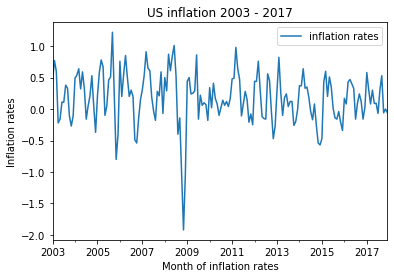

In [8]:
us_inflation_df.plot()
plt.title("US inflation 2003 - 2017")
plt.xlabel('Month of inflation rates')
plt.ylabel('Inflation rates')
plt.legend(['inflation rates'])

### check for stationarity

In [9]:
def stationarity_test(timeseries):
    """Augmented dicky fuller test for stationarity"""
    print("Results of dicky fuller tests")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(df_test[0:4], index=["Test Statistic", "p-value", "#Lags used", "Number of observations used"])
    print(df_output)

In [10]:
stationarity_test(us_inflation_df)

Results of dicky fuller tests
Test Statistic                -8.599116e+00
p-value                        6.946317e-14
#Lags used                     1.000000e+00
Number of observations used    1.780000e+02
dtype: float64


In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

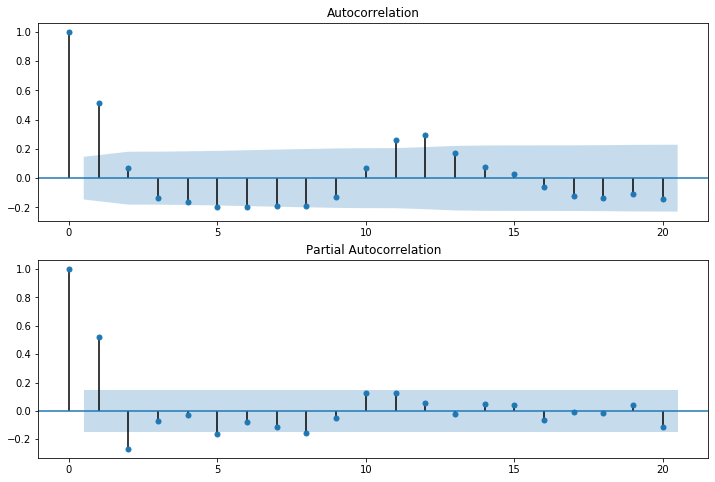

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(us_inflation_df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(us_inflation_df, lags=20, ax=ax2)

In [13]:
cumsum_us_inflation = np.cumsum(us_inflation_df)

In [14]:
cumsum_us_inflation.head()

months
2003-01-01    0.44
2003-02-01    1.21
2003-03-01    1.81
2003-04-01    1.59
2003-05-01    1.43
Name: inflation_rates, dtype: float64

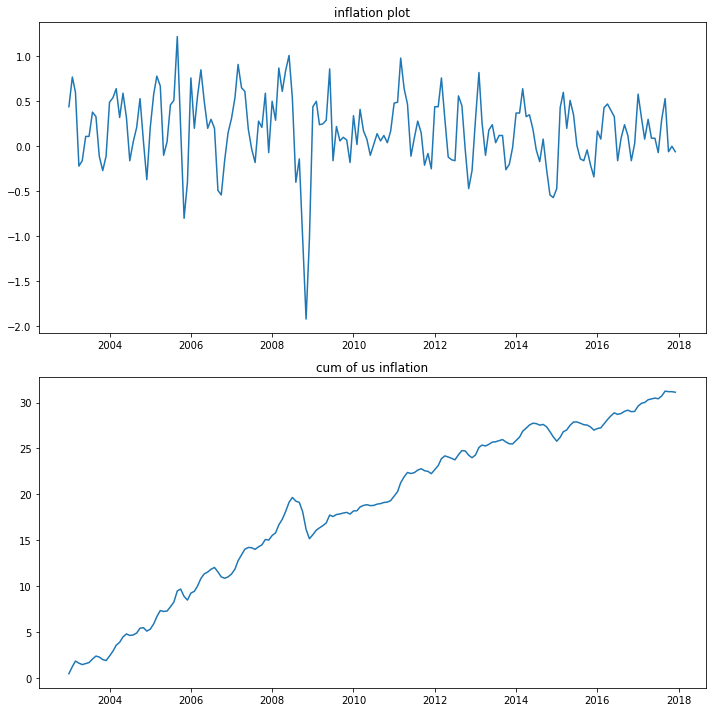

In [15]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,1,1)
plt.plot(us_inflation_df)
plt.title("inflation plot")

ax1 = plt.subplot(2,1,2)
plt.plot(cumsum_us_inflation)
plt.title("cum of us inflation")
plt.tight_layout()

In [16]:
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods=1).mean()
    rol_std = timeseries.rolling(window, min_periods=1).std()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='rolling mean')
    std = plt.plot(rol_std, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation (window = ' + str(window) + ')')

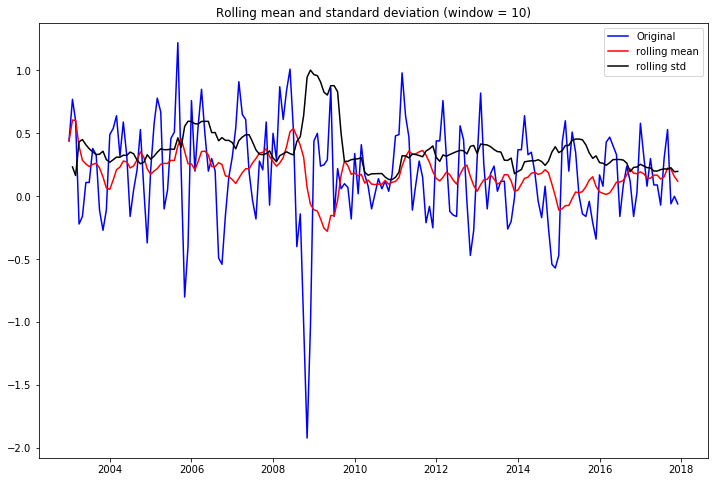

In [17]:
plot_rolling(us_inflation_df, 10)

In [18]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    exwm = plt.plot(expw_ma, color='red', label='EWMA')
    plt.legend(loc='best')
    plt.title('EWMA (alpha = ' + str(alpha) + ')')
    plt.show()

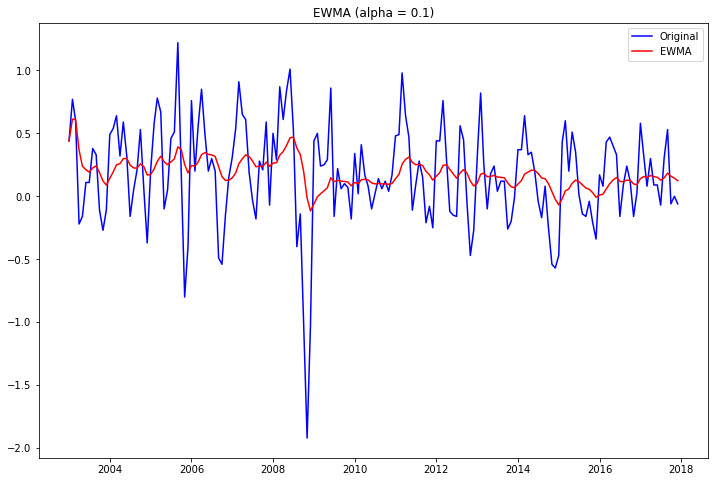

In [19]:
plot_ewma(us_inflation_df, 0.1)

In [20]:
us_inflation_df.min()

-1.92

In [21]:
us_inflation[us_inflation["inflation_rates"] == us_inflation_df.min()]

,months,inflation_rates
70,71,-1.92


In [23]:
us_inflation_ts = us_inflation_df

# doing the modeling now

<Figure size 720x720 with 0 Axes>

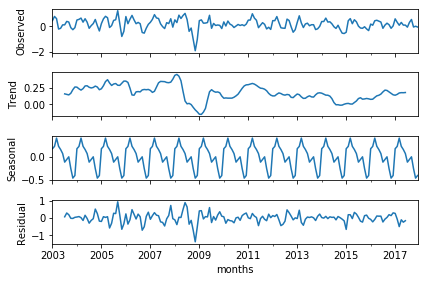

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(us_inflation_ts)
dplot = decomposed.plot()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(us_inflation_ts, model='multiplicative')
dplot = decomposed.plot()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [26]:
from stldecompose import decompose

In [28]:
stl = decompose(us_inflation_ts, period=12)
stl.trend.head()

months
2003-01-01    0.259292
2003-02-01    0.260086
2003-03-01    0.260869
2003-04-01    0.261641
2003-05-01    0.262399
Name: inflation_rates, dtype: float64

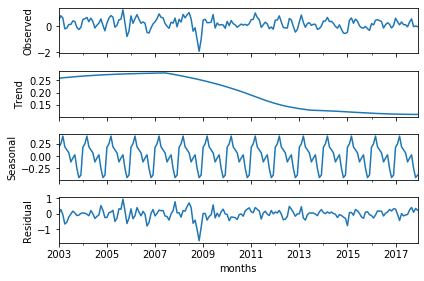

In [29]:
stl_visual = stl.plot()

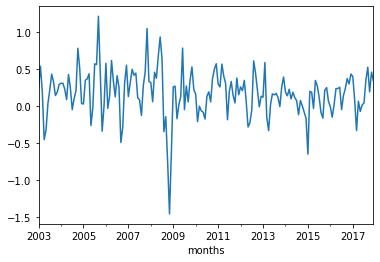

In [30]:
# seasonal adjustment

us_inflation_ts_adj = us_inflation_ts - decomposed.seasonal
us_inflation_ts_adj.plot()

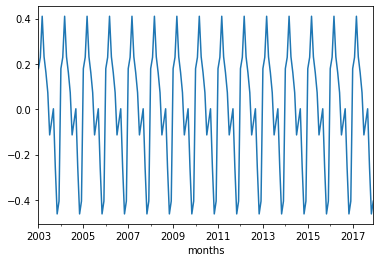

In [31]:
    decomposed.seasonal.plot()

In [32]:
# decomposotion based on srtl

from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [34]:
stl = decompose(us_inflation_ts, period=12)

fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal=True)

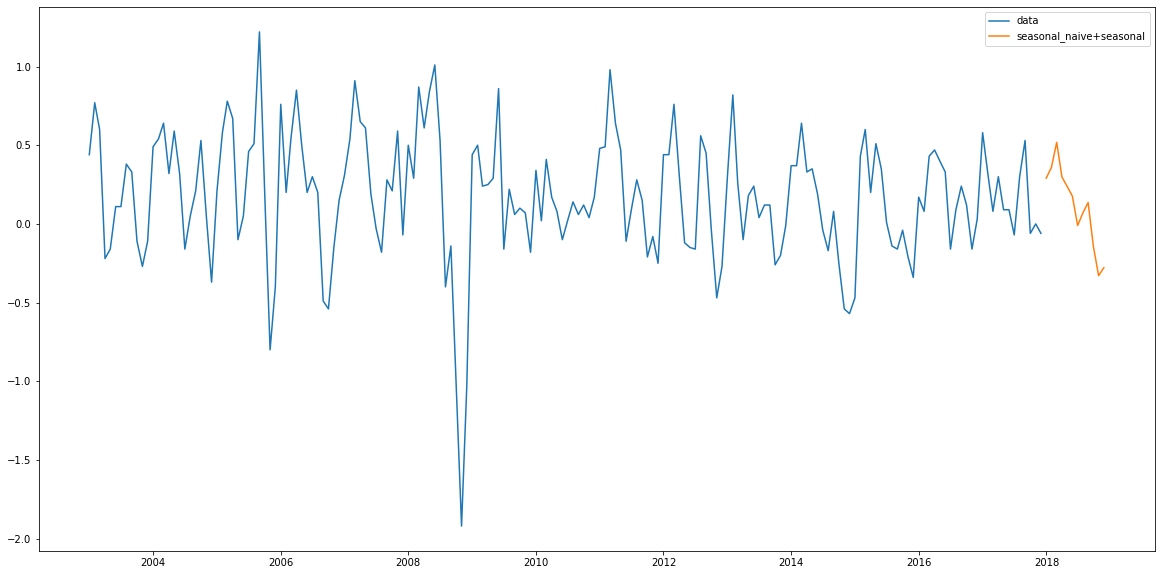

In [43]:
# plot of the forecast with the original data

fig = plt.figure(figsize=(20, 10))
plt.plot(us_inflation_ts, label='data')
plt.plot(fcast, label=fcast.columns[0])

# plt.xlim('1920', '1941')
# plt.ylim(2000, 2020)
plt.legend()

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [45]:
exps_model = ExponentialSmoothing(us_inflation_ts, seasonal='additive', seasonal_periods=12)

/Users/joydeepbhattacharjee/miniconda3/envs/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
exps_model_fit = exps_model.fit()

In [47]:
# the alpha coefficient

exps_model_fit.params['smoothing_level']

1.2166681578884496e-10

In [48]:
# the gamma coefficient

exps_model_fit.params['smoothing_seasonal']

0.0

In [49]:
# beta coeeficient.
# since there is no trend and hence this should be nan

exps_model_fit.params['smoothing_slope']

nan

In [51]:
exps_model_fit.forecast(steps=12)

2018-01-01    0.357331
2018-02-01    0.425331
2018-03-01    0.583331
2018-04-01    0.362666
2018-05-01    0.302001
2018-06-01    0.238667
2018-07-01    0.052000
2018-08-01    0.130667
2018-09-01    0.196000
2018-10-01   -0.082667
2018-11-01   -0.269998
2018-12-01   -0.220664
Freq: MS, dtype: float64

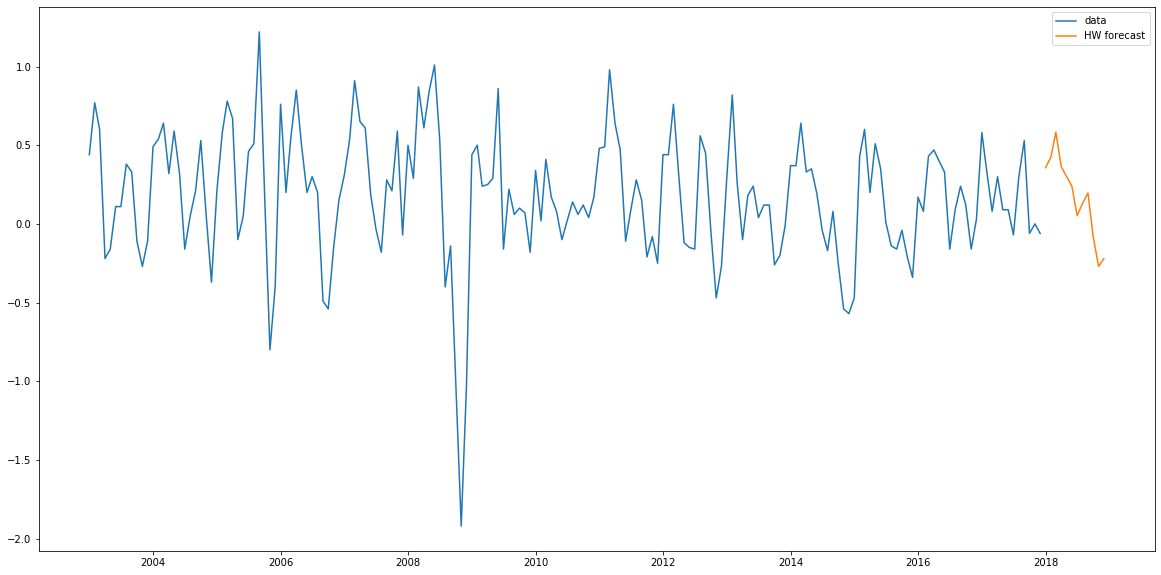

In [54]:
# plot of the forecast with the original data
fcast = exps_model_fit.forecast(steps=12)

fig = plt.figure(figsize=(20, 10))
plt.plot(us_inflation_ts, label='data')
plt.plot(fcast, label='HW forecast')

# plt.xlim('1920', '1941')
# plt.ylim(30, 70)
plt.legend()

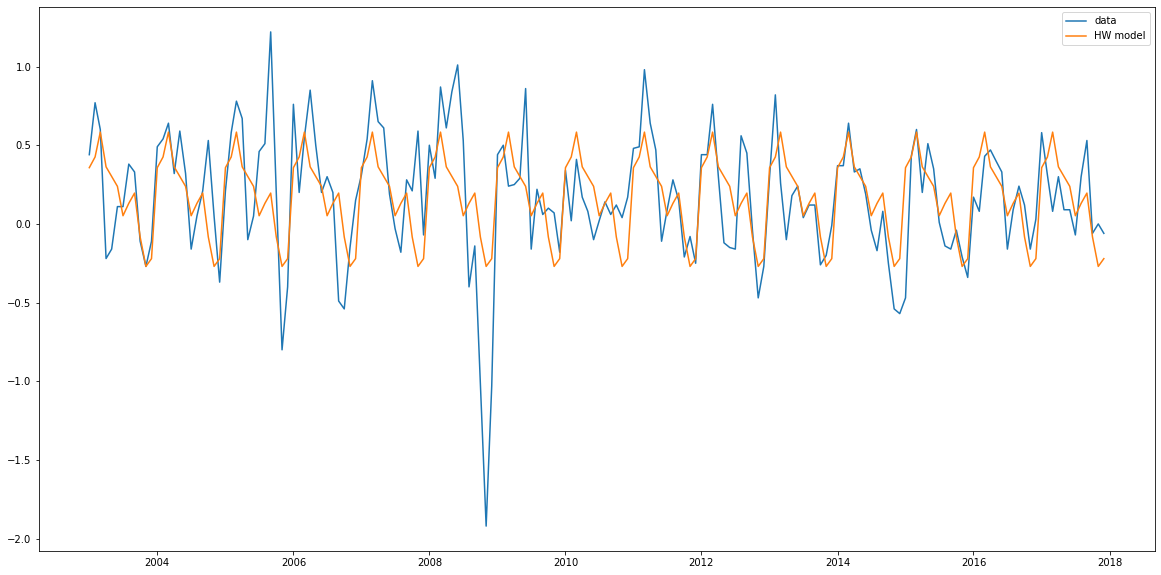

In [56]:
# comparing the model to original data
fig = plt.figure(figsize=(20, 10))
plt.plot(us_inflation_ts, label='data')
plt.plot(exps_model_fit.fittedvalues, label='HW model')

# plt.xlim('1920', '1941')
# plt.ylim(30, 70)
plt.legend()

# prophet

In [58]:
us_inflation_df = pd.DataFrame({'ds': us_inflation_ts.index, 'y': us_inflation_ts.values})

In [59]:
us_inflation_df.head()

,ds,y
0,2003-01-01,0.44
1,2003-02-01,0.77
2,2003-03-01,0.60
3,2003-04-01,-0.22
4,2003-05-01,-0.16


In [60]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [61]:
mymodel = Prophet()
mymodel.fit(us_inflation_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future_data = mymodel.make_future_dataframe(periods=12, freq='m')
fcast = mymodel.predict(future_data)

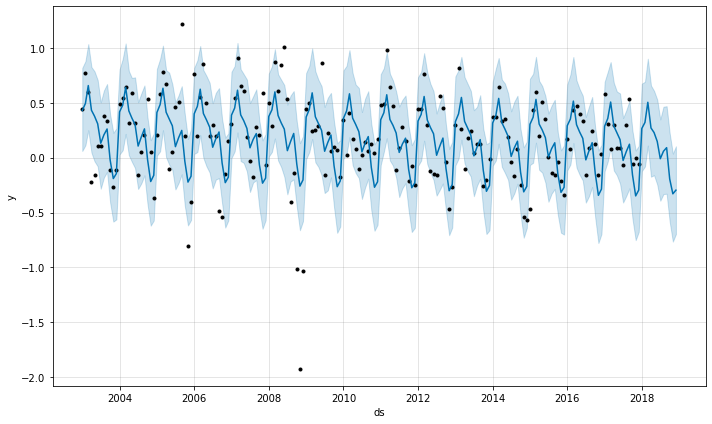

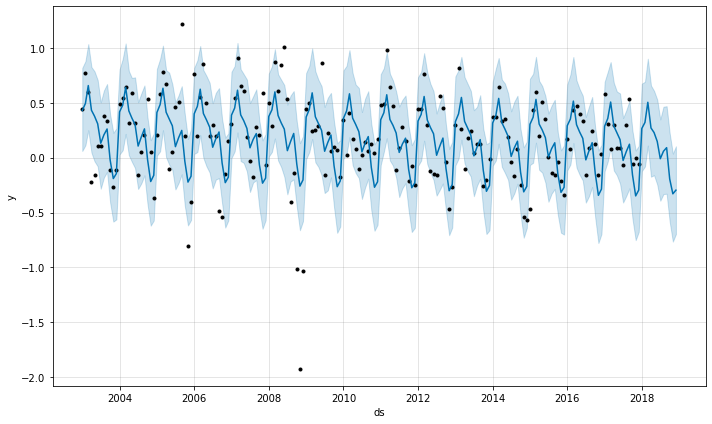

In [63]:
mymodel.plot(fcast)